## ***MODELO APLICADO PREDICCIÓN PRECIO DE VIVIENDAS A LA VENTA***

Tras evaluar los diferentes modelos seleccionados con diferentes conjuntos de datos, finalmente el que tras diferentes pruebas presenta los mejores valores de evaluación ha sido el modelo:
* Linear Regressor sin procesar y sin Outliers

<br>

Procedemos a aplicar el modelo a los datos y crearemos nuestro dataset final para su uso en la visualización de datos. A partir del mismo podremos sacar conclusiones de rentabilidad de viviendas a la venta e identificaremos oportunidades de inversión.

### **Importamos las librerías y modulos necesarios**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### **Leemos el fichero de datos sin outliers**

In [2]:
file_path = "../data/data_model_churriana_without_outliers.csv"
data = pd.read_csv(file_path, index_col = 0)

In [3]:
data.head()

,latitude,longitude,price,energy_certification,room_number,bath_number,has_garden,has_terrace,has_parking,has_swimmingpool,has_lift,constructed_area,is_new_development,is_needs_renovating,is_goog_condition
0,36.666638,-4.464576,395000,7,4,3,1.0,1.0,1.0,1.0,0.0,194,0,0,1
1,36.663719,-4.503897,640000,7,4,2,1.0,1.0,1.0,1.0,0.0,310,0,0,1
2,36.656894,-4.502930,567000,7,5,4,1.0,1.0,0.0,1.0,0.0,410,0,0,1
3,36.671190,-4.516900,375900,8,4,2,1.0,1.0,1.0,1.0,1.0,236,1,0,0
4,36.671190,-4.516900,249900,8,2,2,0.0,1.0,1.0,1.0,1.0,150,1,0,0


### **Tabla para evaluación de los modelos**
Creamos una tabla vacía con las siguientes columnas: 'Modelo', 'Detalles', 'R2 train', 'R2 test', 'MAE train' y 'MAE test'. Esta nos dará de un simple vistalo los resultados de evaluación de la regresión lineal.

In [4]:
resultados = pd.DataFrame({
    'Modelo':[],
    'Detalles':[],
    'R2 train':[],
    'R2 test':[],
    'MAE train':[],
    'MAE test':[]
})

**Definimos dos funciones que nos ayudarán a evaluar posteriormente el rendimiento de los modelos.**

In [5]:
def error_absoluto_medio(y,y_pred):
    v = np.abs(y - y_pred)
    return v.sum()/len(y)
    
def error_gen(y_train,y_pred_train,y_test,y_pred_test):
    MAE_TRAIN = error_absoluto_medio(y_train,y_pred_train)
    MAE_TEST = error_absoluto_medio(y_test,y_pred_test)
    return MAE_TRAIN,MAE_TEST

### **Regresión Lineal**

##### **Definimos la variable Objetivo y las features**

In [6]:
x = data.drop('price',axis=1)
y = data['price']

##### **División de datos en Train y Test**

In [7]:
#dividimos el conjunto
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

##### **Definimos la instación del modelo, dónde se guardarán los datos entrenados**

In [8]:
#definimos la instancia
lr = LinearRegression()

##### **Entrenamos el modelo**

In [9]:
#Entrenamos los datos de prueba
lr.fit(x_train,y_train)

LinearRegression()

In [10]:
#metricas de evaluación
r2_train = lr.score(x_train,y_train)
r2_test = lr.score(x_test,y_test)

##### **Hacemos la predicción tanto en el conjunto de entrenamiento como en el test**

In [11]:
#aplicamos el modelo
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

##### **Evaluamos los resultados obtenidos**

In [12]:
MAE_train = error_absoluto_medio(y_train,y_train_pred)
    
MAE_test = error_absoluto_medio(y_test,y_test_pred)

r2_train,r2_test,MAE_train,MAE_test



final = resultados.shape[0]
resultados.loc[final] = ['Regresión Lineal','Sin procesar/Sin Outliers',r2_train,r2_test,MAE_train,MAE_test]
resultados

,Modelo,Detalles,R2 train,R2 test,MAE train,MAE test
0,Regresión Lineal,Sin procesar/Sin Outliers,0.769808,0.831022,64890.018077,59129.715869


#### **Gráficas para visualizar los resultados de las predicciones más detalladamente.**

##### **Valores residuales**

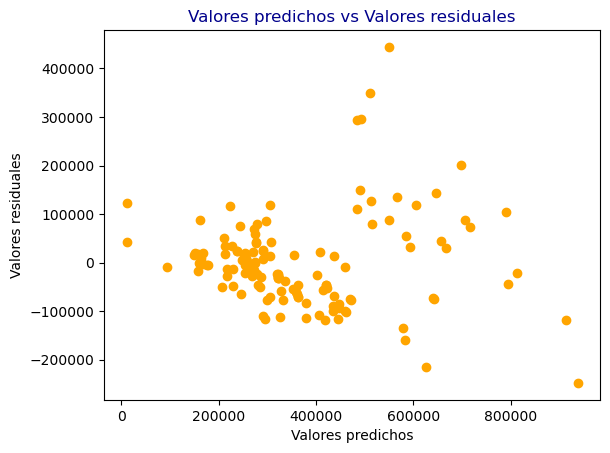

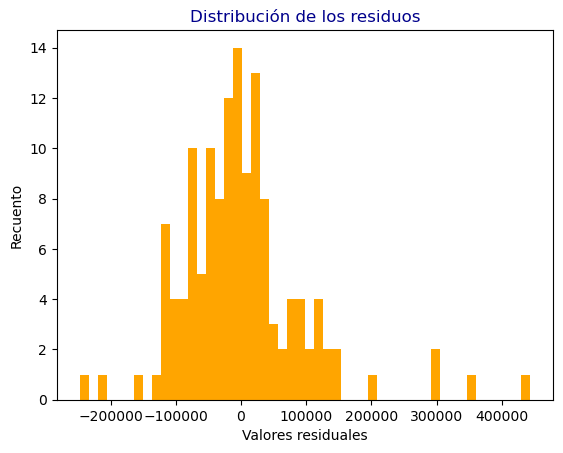

In [13]:
residuals = y_train - y_train_pred

# Gráfico de los residuos
plt.scatter(y_train_pred, residuals, color="orange")
plt.xlabel("Valores predichos")
plt.ylabel("Valores residuales")
plt.title("Valores predichos vs Valores residuales", color="darkblue")
plt.show()

# Verificación de la normalidad de los residuos
plt.hist(residuals, bins=50, color="orange")
plt.xlabel("Valores residuales")
plt.ylabel("Recuento")
plt.title("Distribución de los residuos", color="darkblue")

plt.show()

**Otras métricas de evaluación - Validación cruzada con 3 folds**<br>
Los resultados no son todo lo buenos que nos gustaría. 
* Para el conjunto de train obtenemos una precisión del 67% y una desviación estandar del 19%.
* Pero para test obtenemos unos resultados bajos, una precisión inferior al 40% y una alta desviación, del 86%.

In [40]:
from sklearn.model_selection import cross_val_score

# Ejecución de la validación cruzada con 3 folds
scores = cross_val_score(lr, x_train, y_train, cv=3)

# Imprimir la precisión promedio y la desviación estándar
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.67 (+/- 0.19)


In [55]:
# Ejecución de la validación cruzada con 3 folds
scores = cross_val_score(lr, x_test, y_test, cv=3)

# Imprimir la precisión promedio y la desviación estándar
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.34 (+/- 0.86)


**Visualización de los resultados predichos vs reales:**

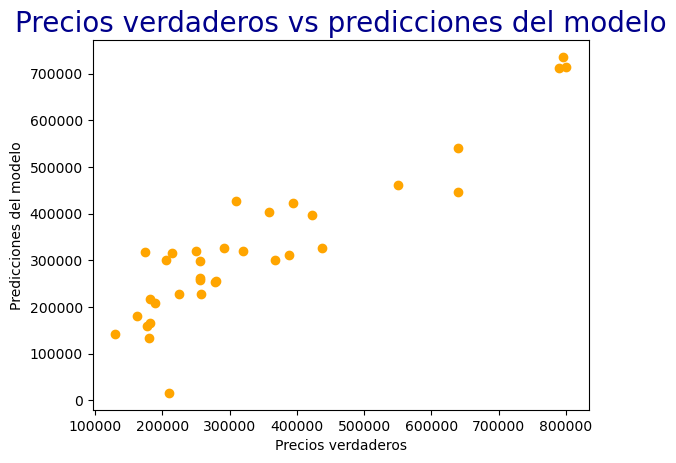

In [15]:
plt.scatter(y_test, y_test_pred, color='orange')
plt.xlabel("Precios verdaderos")
plt.ylabel("Predicciones del modelo")
plt.title("Precios verdaderos vs predicciones del modelo", size= 20, color='darkblue')
plt.show()

**Valores predichos que produjo el modelo en relación con cada característica:**

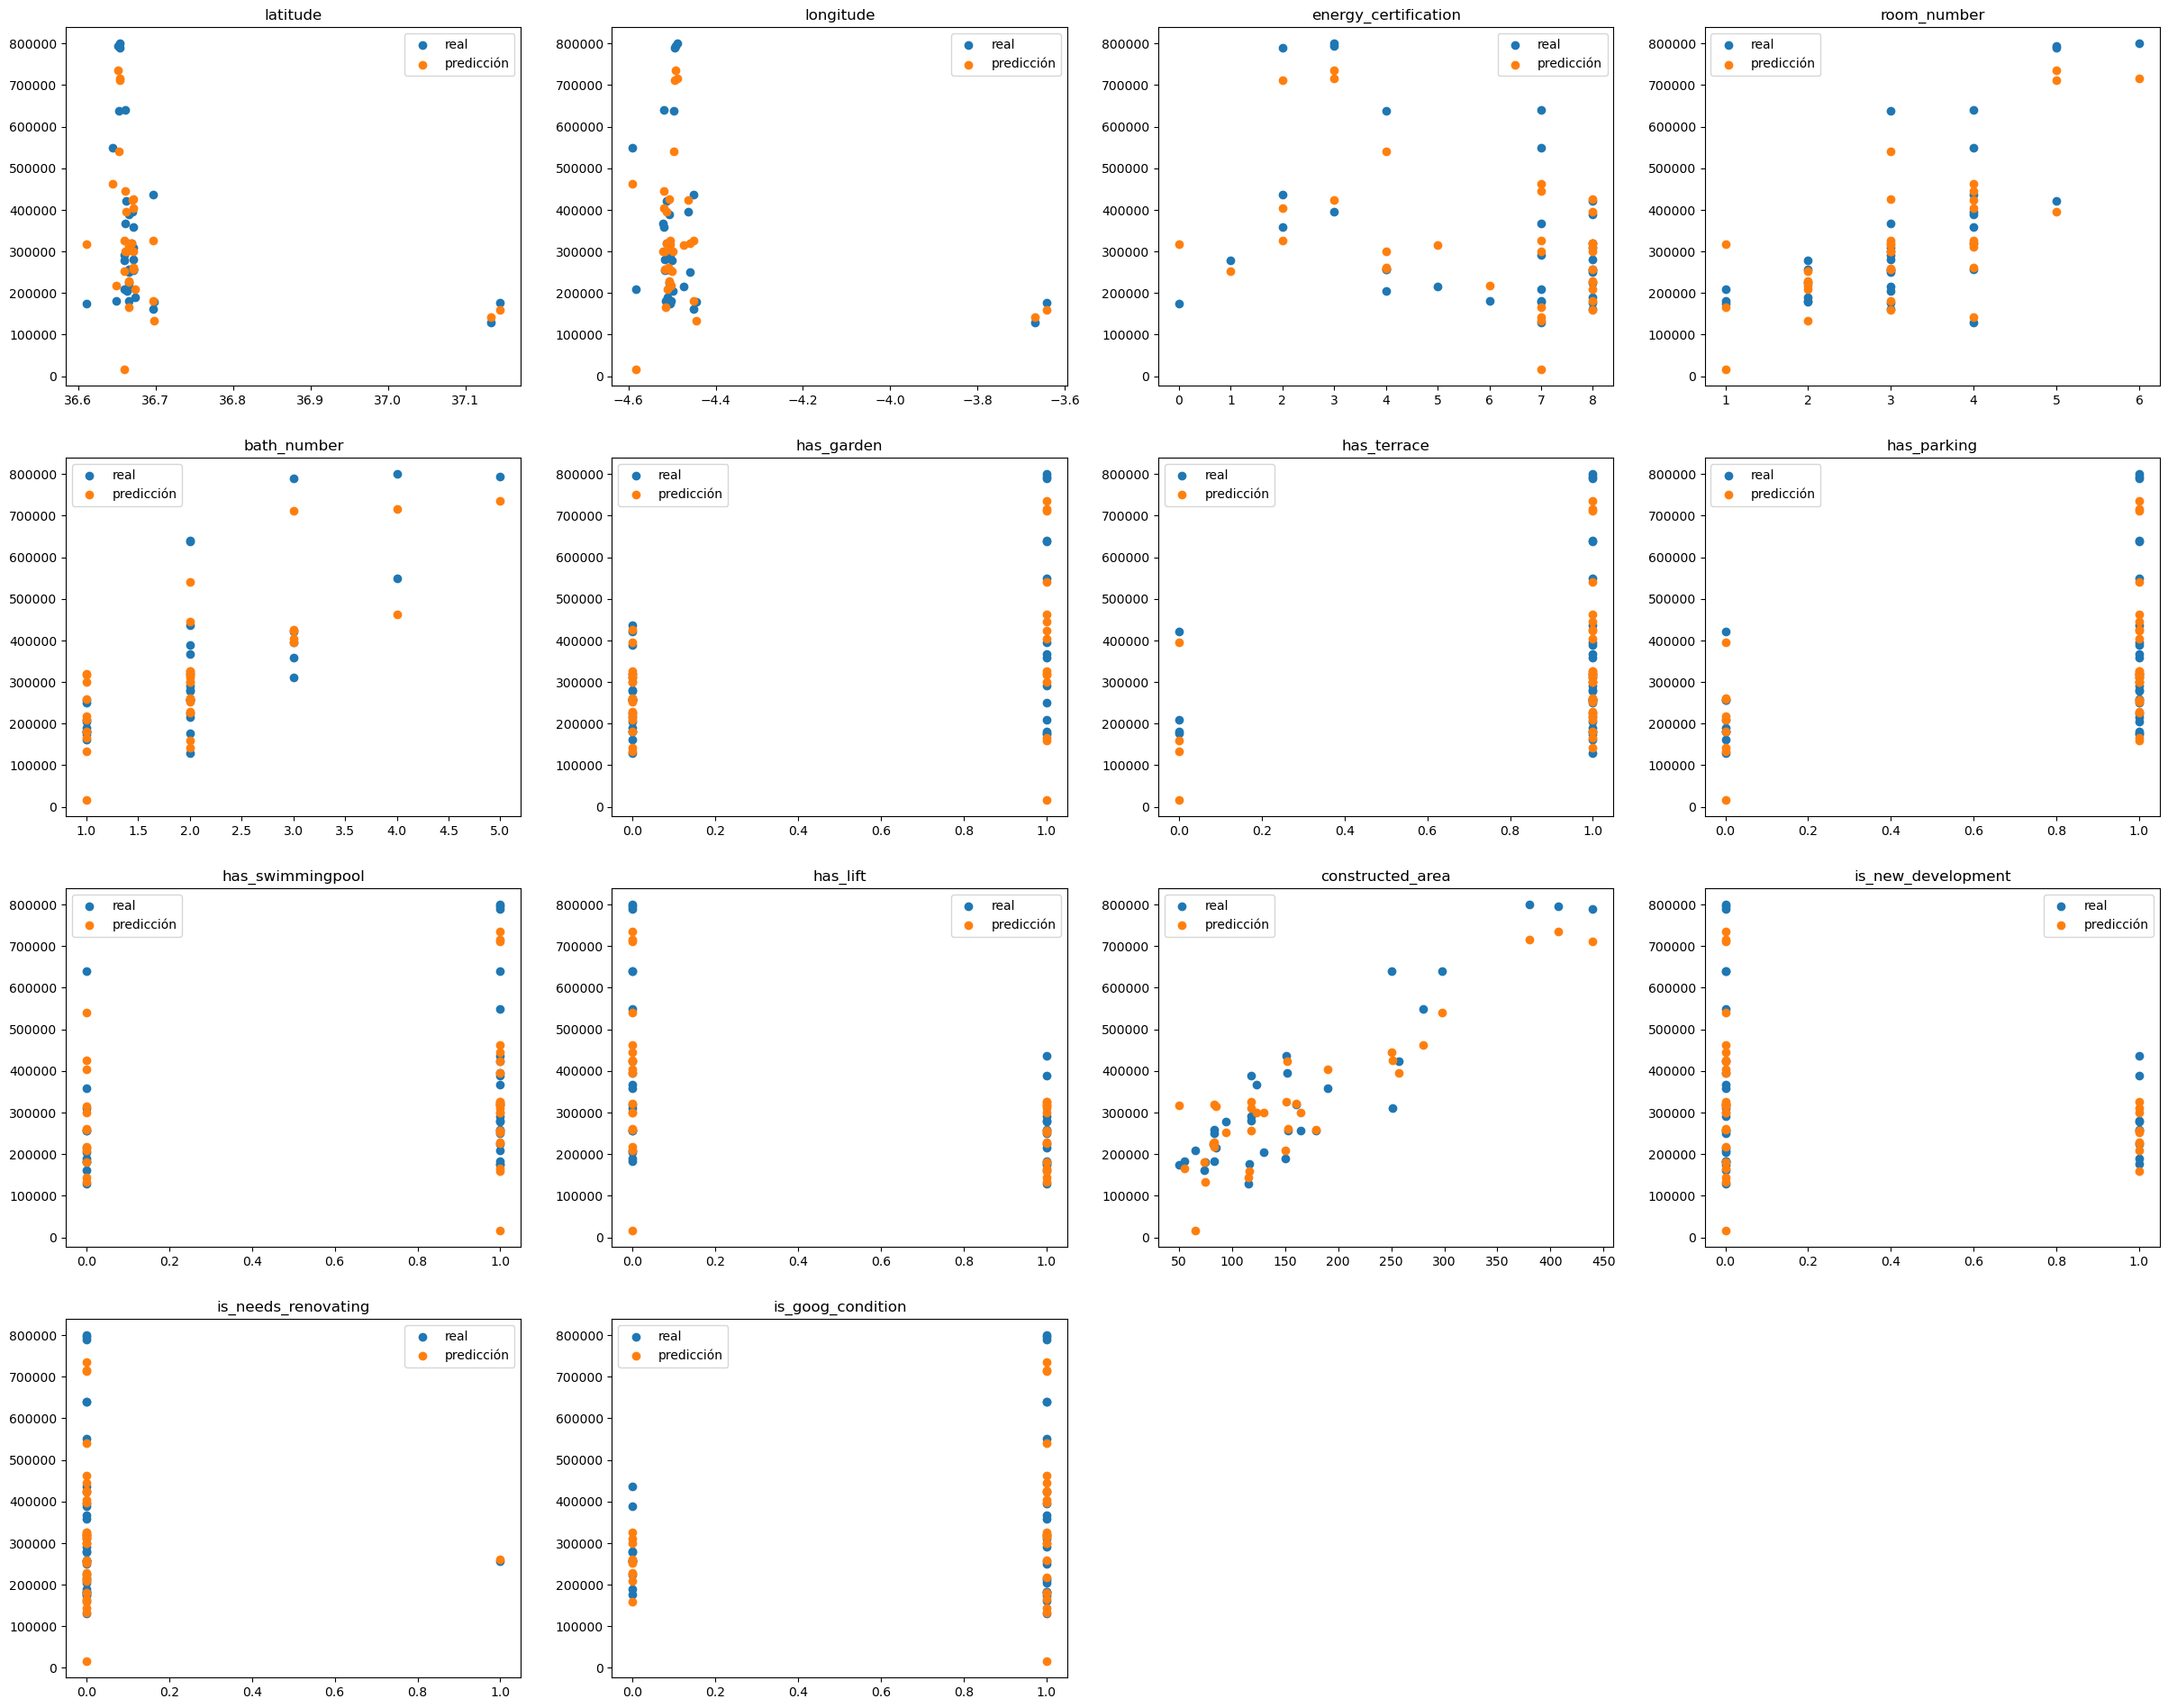

In [16]:
fig = plt.figure(figsize=(30,30))

columns = x_test.columns

for c, num in zip(columns, range(0,14)):
    ax = fig.add_subplot(5, 4, num+1)
    ax.scatter(x_test[c], y_test)
    ax.scatter(x_test[c], y_test_pred)
    ax.set_title(c)
    ax.legend(['real', 'predicción'])

plt.savefig('../graficas/variables_pred.png')
plt.show()

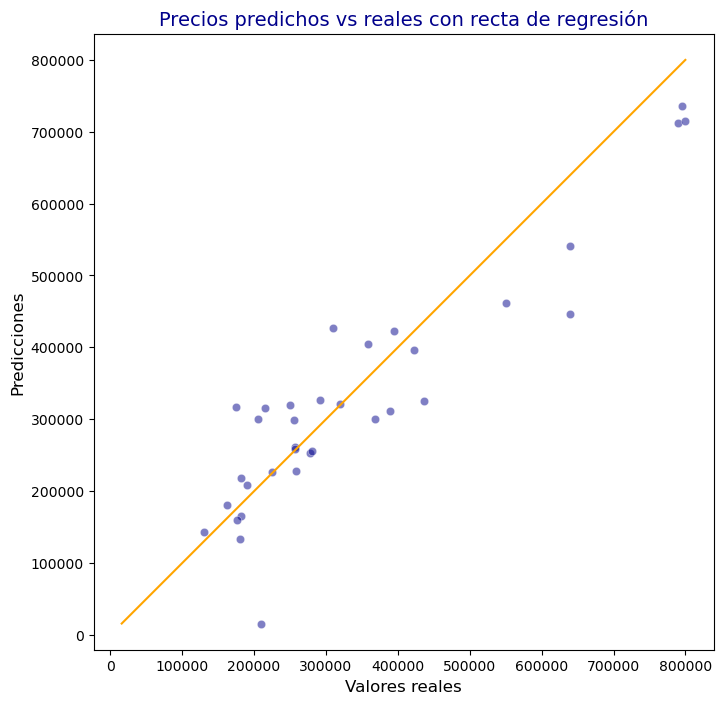

In [39]:
plt.style.use("tableau-colorblind10")
plt.figure(figsize=(8,8))

sns.scatterplot(x=y_test, y=y_test_pred, color='darkblue', alpha=0.5)

p1 = max(max(y_test_pred), max(y_test))
p2 = min(min(y_test_pred), min(y_test))
sns.lineplot(x=[p1, p2], y=[p1, p2], color='orange')

plt.xlabel('Valores reales', fontsize=12)
plt.ylabel('Predicciones', fontsize=12)
plt.axis('equal')
plt.title("Precios predichos vs reales con recta de regresión", fontsize=14, color='darkblue')

plt.savefig('../graficas/modelo_pred.png')
plt.show()

A partir del gráfico de dispersión anterior de los valores reales frente a los predichos, es posible sacar las siguientes conclusiones:

* Cuanto más cerca estén los puntos de dispersión de la línea de regresión, mejor será el modelo. El R² obtenido fue de 0,83, que es un puntaje relativamente aceptable. Esto da como resultado que todos los puntos estén cerca de la línea diagonal. 
* Si analizamos más a fondo los valores, podemos concluir que cuanto más alto es el precio de la vivienda, más disperso es el modelo. Esta afirmación puede deberse a la poca cantidad de datos para viviendas con precios superiores, por lo que era de esperar que el modelo ajustara mejor los precios de viviendas medias y no de lujo: superiores al millón de euros. A pesar de excluir los aoutliers (17 viviendas), la mayor cantidad de viviendas del conjunto de datos presentan precios entre los 200.000 y 300.000 euros.

En cualquier caso, el rendimiento de nuestro modelo será más que aceptable ya que los puntos se ajustan a la recta de regresión y el valor de R² es cercano al 84% de efectividad.

In [18]:
y_test_pred

array([209078.85019402, 315465.7971302 , 261875.66084473, 311242.89761478,
       461894.87021071, 316843.13524255, 325757.97238174, 217718.50237042,
       426521.73955035, 712456.9098552 , 423064.60667016, 320021.49800497,
       715163.67168897, 404409.7777669 , 258117.22663465, 396359.90562084,
       540923.34961611, 320673.01681329, 133196.08908631, 165300.50578861,
       735997.05951779, 299496.49335858, 180759.81443073, 252787.13015454,
       445756.64141652, 300220.5298374 , 143106.50362213,  15796.49421036,
       159368.72082275, 326735.97871041, 299714.23422185, 228221.19018981,
       227299.86964259, 256194.42763883])

#### **Predicción del conjunto de datos sin dividir**

Normalmente el modelo se aplica a nuevos datos de entrada, en este caso a falta de datos diferentes de esta zona de estudio tan específica empleamos el mismo conjunto como nuevos datos de entrada.<br><br>
Aplicamos el modelo y generamos la predicción de precios de las viviendas.

In [45]:
data_pred = lr.predict(x)

##### **Creamos una columna en el dataset para incluir los precios predichos.**

data['Price_predict'] = data_pred

In [21]:
data.head()

,latitude,longitude,price,energy_certification,room_number,bath_number,has_garden,has_terrace,has_parking,has_swimmingpool,has_lift,constructed_area,is_new_development,is_needs_renovating,is_goog_condition,Price_predict
0,36.666638,-4.464576,395000,7,4,3,1.0,1.0,1.0,1.0,0.0,194,0,0,1,472912.550708
1,36.663719,-4.503897,640000,7,4,2,1.0,1.0,1.0,1.0,0.0,310,0,0,1,512702.150303
2,36.656894,-4.502930,567000,7,5,4,1.0,1.0,0.0,1.0,0.0,410,0,0,1,641954.345151
3,36.671190,-4.516900,375900,8,4,2,1.0,1.0,1.0,1.0,1.0,236,1,0,0,420984.850409
4,36.671190,-4.516900,249900,8,2,2,0.0,1.0,1.0,1.0,1.0,150,1,0,0,260288.941014


**Creamos dos columnas adicionales:**
* Diferencia entre el precio predicho y el real.
* Calculo del porcentaje de rentabilidad.

Algunas viiendas tienen rentabilidades negativas, esto indica que el precio predicho por el modelo es inferior al real lo cual indicaría que esa vivienda tiene un precio superior a lo que realmente debería tener en función de las características del mercado.


In [22]:
data['Var_Prices'] = data['Price_predict'] - data['price'] 

In [23]:
data['%_rentabilidad'] = (data['Var_Prices']/data['price'])*100

In [24]:
data.head()

,latitude,longitude,price,energy_certification,room_number,bath_number,has_garden,has_terrace,has_parking,has_swimmingpool,has_lift,constructed_area,is_new_development,is_needs_renovating,is_goog_condition,Price_predict,Var_Prices,%_rentabilidad
0,36.666638,-4.464576,395000,7,4,3,1.0,1.0,1.0,1.0,0.0,194,0,0,1,472912.550708,77912.550708,19.724696
1,36.663719,-4.503897,640000,7,4,2,1.0,1.0,1.0,1.0,0.0,310,0,0,1,512702.150303,-127297.849697,-19.890289
2,36.656894,-4.502930,567000,7,5,4,1.0,1.0,0.0,1.0,0.0,410,0,0,1,641954.345151,74954.345151,13.219461
3,36.671190,-4.516900,375900,8,4,2,1.0,1.0,1.0,1.0,1.0,236,1,0,0,420984.850409,45084.850409,11.993842
4,36.671190,-4.516900,249900,8,2,2,0.0,1.0,1.0,1.0,1.0,150,1,0,0,260288.941014,10388.941014,4.157239


Guardamos el dataset un un nuevo csv

In [25]:
data.to_csv('../data/datos_finales_visualizacion.csv', index=False)

#### **Inclusión de columnas título y localización**
Para la visualización queremos volver a agregar las columnas iniciales eliminadas para el modelo: título de la vivienda y localización. Para ello usamos la función de concat de pandas.
Una vez agregada procedemos a guardar nuevamente el dataet sobreescribiendo los datos del anterior para poder usar el mismo en nuestra app de Streamlit.

In [26]:
file_path = "../data/datos_finales_visualizacion.csv"
data = pd.read_csv(file_path)

In [27]:
file_path = "../data/clean_properties_churriana_without_outliers.csv"
data_inicial = pd.read_csv(file_path)

In [28]:
data_inicial

,Unnamed: 0,titulo,localizacion,latitude,longitude,price,energy_certification,room_number,bath_number,has_garden,has_terrace,has_parking,has_swimmingpool,has_lift,constructed_area,is_new_development,is_needs_renovating,is_goog_condition
0,0,Chalet adosado en venta en Guadalmar,"Churriana, Málaga",36.666638,-4.464576,395000,inProcess,4,3,1.0,1.0,1.0,1.0,0.0,194,0,0,1
1,1,Casa o chalet independiente en venta en calle ...,"Churriana-El Pizarrillo-La Noria-Guadalsol, Má...",36.663719,-4.503897,640000,inProcess,4,2,1.0,1.0,1.0,1.0,0.0,310,0,0,1
2,2,Casa o chalet independiente en venta en calle ...,"Cortijo de Maza-Finca Monsalvez-El Olivar, Málaga",36.656894,-4.502930,567000,inProcess,5,4,1.0,1.0,0.0,1.0,0.0,410,0,0,1
3,3,"Ático en venta en calle Bangladesh, 25","Churriana-El Pizarrillo-La Noria-Guadalsol, Má...",36.671190,-4.516900,375900,unknown,4,2,1.0,1.0,1.0,1.0,1.0,236,1,0,0
4,4,"Piso en venta en calle Bangladesh, 25","Churriana-El Pizarrillo-La Noria-Guadalsol, Má...",36.671190,-4.516900,249900,unknown,2,2,0.0,1.0,1.0,1.0,1.0,150,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,182,Chalet adosado en venta en calle Malasia,"Churriana-El Pizarrillo-La Noria-Guadalsol, Má...",36.669872,-4.519457,320000,b,3,3,1.0,1.0,1.0,1.0,0.0,140,0,0,1
166,183,Chalet adosado en venta en calle Isabel Barreto,"Cortijo de Maza-Finca Monsalvez-El Olivar, Málaga",36.661758,-4.504469,595000,e,4,3,1.0,1.0,1.0,0.0,0.0,226,0,0,1
167,184,Casa o chalet independiente en venta en calle ...,"Churriana-El Pizarrillo-La Noria-Guadalsol, Má...",36.664690,-4.519482,640000,unknown,4,2,1.0,1.0,1.0,1.0,0.0,310,0,0,1
168,185,Dúplex en venta en calle Tanzania,"Churriana-El Pizarrillo-La Noria-Guadalsol, Má...",36.661137,-4.519971,367500,inProcess,3,2,1.0,1.0,1.0,1.0,0.0,123,0,0,1


In [29]:
data_final = pd.concat([data, data_inicial[['titulo', 'localizacion']]], axis=1)


In [30]:
data_final = data_final[["titulo", "localizacion", "latitude", "longitude", "price", "energy_certification", "room_number", "bath_number", "has_garden", "has_terrace", "has_parking", "has_swimmingpool", "has_lift", "constructed_area",
            "is_new_development", "is_needs_renovating", "is_goog_condition", "Price_predict", "Var_Prices", "%_rentabilidad"]]

In [31]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   titulo                170 non-null    object 
 1   localizacion          170 non-null    object 
 2   latitude              170 non-null    float64
 3   longitude             170 non-null    float64
 4   price                 170 non-null    int64  
 5   energy_certification  170 non-null    int64  
 6   room_number           170 non-null    int64  
 7   bath_number           170 non-null    int64  
 8   has_garden            170 non-null    float64
 9   has_terrace           170 non-null    float64
 10  has_parking           170 non-null    float64
 11  has_swimmingpool      170 non-null    float64
 12  has_lift              170 non-null    float64
 13  constructed_area      170 non-null    int64  
 14  is_new_development    170 non-null    int64  
 15  is_needs_renovating   1

In [32]:
data_final.to_csv('../data/datos_finales_visualizacion.csv', index=False)

### **Guardamos el modelo usando la libreria Pickle para usarla en nuestro archivo py para la app de Streamlit**

Para poder usar los datos guardados del entrenamiento del modelo en la instancia creada (lr) debemos usar esta librería la cual nos permite compartir objetps entre archivos de diferentes tipos, en este caso de un archivo ipynb a py.

importamos la librería

In [33]:
import pickle

* Abrimos fichero binario para guardar en él el objeto lr (Regresión Lineal) mediante la librería de pickle para que posteriormente podamos leer este objeto desde el front-end.
* Volvamos la instancia del modelo entrenado en el fichero de salida.
* Cerramos el fichero.

In [34]:
pickle_file = open('lr.pickle', 'wb')

pickle.dump(lr, pickle_file)

pickle_file.close()

#### **Siguiente Nootebook <FONT COLOR="orange">front-end-app.py**<font>